## Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Control points

In [2]:
# Load of digitazed control points from Gen-6 plot, at 75ºF, and presentation (first 5 lines)

df_gen6 = pd.read_excel('gen6_75f.xlsx', sheet_name='gen6_75f')
df_gen6.head(5)

,rw,cw,sal
0,0.040869,24.468531,270000
1,0.040869,24.468531,250000
2,0.044783,22.329795,200000
3,0.049073,20.378001,170000
4,0.056425,17.722766,140000


In [3]:
# Statistical summary of the control points

df_gen6.describe()

,rw,cw,sal
count,32.000000,32.000000,32.00000
mean,1.619892,6.492453,52981.25000
std,2.371236,8.011709,76140.01719
min,0.040869,0.116372,600.00000
25%,0.095830,0.503452,2750.00000
50%,0.457210,2.200179,13000.00000
75%,2.038046,10.463559,72500.00000
max,8.593133,24.468531,270000.00000


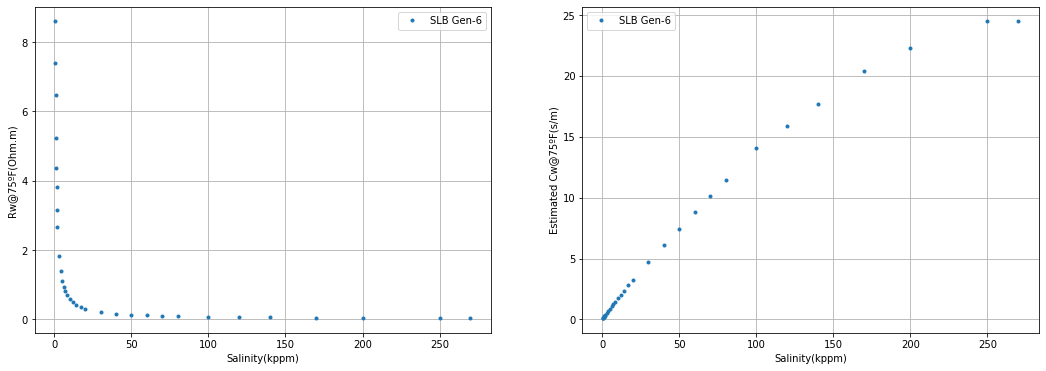

In [4]:
# Plots of the control points

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(df_gen6['sal']/1000, df_gen6['rw'], '.', label="SLB Gen-6")
# plt.xlim(0,300)
# plt.ylim(0,35)
plt.legend()
plt.grid(True)
plt.xlabel("Salinity(kppm)")
plt.ylabel("Rw@75ºF(Ohm.m)")

plt.subplot(122)
plt.plot(df_gen6['sal']/1000, df_gen6['cw'], '.', label="SLB Gen-6")
# plt.xlim(0,300)
# plt.ylim(0,35)
plt.legend()
plt.grid(True)
plt.xlabel("Salinity(kppm)")
plt.ylabel("Estimated Cw@75ºF(s/m)")

plt.show()

Fig.1 - Control points from SLB Gen-6

## Input salinities and conductivities for verification

The maximum salinity of the water is around 263,080 ppm (26.3 wt%) so values way above this limit are unreal. Just for verification purpose a collection (DataFrame) of salinities are created from 1 to 300,000 ppm (step of 10) and its corresponding conductivity

In [5]:
# Array of water salinity, from 1 to 300,000 ppm, and conductivity

df_salrw = pd.DataFrame(np.arange(1,300000,10), columns = ["sal"])

In [6]:
df_salrw.describe()

,sal
count,30000.000000
mean,149996.000000
std,86603.983742
min,1.000000
25%,74998.500000
50%,149996.000000
75%,224993.500000
max,299991.000000


## Salinity to water resistivity

As the control points were taken only at 75º F, all the calculation with the verification pairs were done at the same temperature.

### By Crain (C)

In [7]:
# Resistivity by Cain (rw75c) from salinity

df_salrw ['rw75c'] = ((400000 / 75) / df_salrw ['sal']) ** 0.88

# Corresponding conductivity

df_salrw ['cw75c'] = 1/df_salrw ['rw75c']

### By Bateman-Konen (BK)

In [8]:
# Resistivity by Bateman-Konen, from salinity

df_salrw ['rw75bk'] = 0.0123 + (3647.5 / df_salrw ['sal']**0.955)

# Corresponding conductivity

df_salrw ['cw75bk'] = 1/df_salrw ['rw75bk']

### By Kennedy (K)

Kennedy proposed a quadratic equation to get conductivity (cwk) from salinity in % (sal/1000):

    cwk = a(sal/10000 - ws0)^2 + b(sal/10000 - ws0) + c0

In [9]:
# Conductivity by Kenndy (cwk), from salinity

a = - 0.02922
b = - 0.0364
ws0 = 29.46518957
c0 = 24.30854

df_salrw ['cw75k'] = a*((df_salrw ['sal']/10000) - ws0)**2 + b*((df_salrw ['sal']/10000) - ws0) + c0

# Corresponding resistivity

df_salrw ['rw75k'] = 1/df_salrw ['cw75k']

In [10]:
df_salrw.describe()

,sal,rw75c,cw75c,rw75bk,cw75bk,cw75k,rw75k
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,149996.000000,0.237549,18.447567,0.316481,17.390867,16.529207,0.180063
std,86603.983742,11.158433,9.772095,21.254530,8.324239,7.275041,1.289224
min,1.000000,0.028834,0.000525,0.033747,0.000274,0.012514,0.041119
25%,74998.500000,0.037141,10.239704,0.040528,10.764584,11.010125,0.043207
50%,149996.000000,0.053065,18.844787,0.053876,18.561256,18.720707,0.053417
75%,224993.500000,0.097659,26.924689,0.092897,24.674581,23.144257,0.090825
max,299991.000000,1904.403104,34.681379,3647.512300,29.632680,24.319876,79.913489


## Plots of salinity to estimated water resistivity

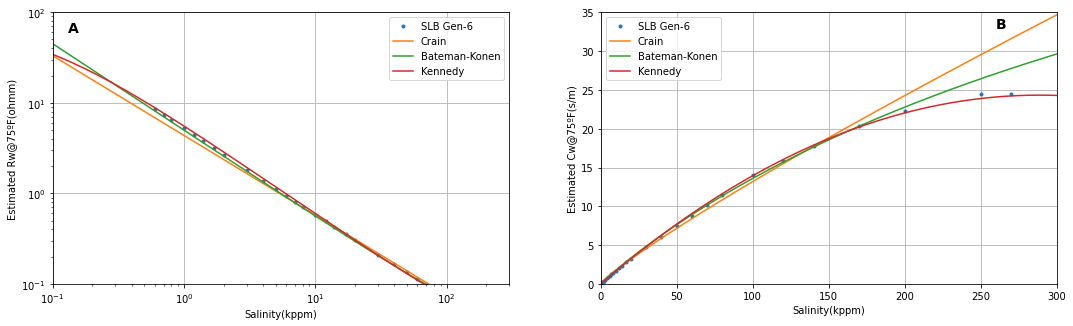

In [11]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.loglog(df_gen6['sal']/1000, df_gen6['rw'], '.', label="SLB Gen-6")
plt.loglog(df_salrw['sal']/1000, df_salrw['rw75c'], label="Crain")
plt.loglog(df_salrw['sal']/1000, df_salrw['rw75bk'], label="Bateman-Konen")
plt.loglog(df_salrw['sal']/1000, df_salrw['rw75k'], label="Kennedy")
plt.legend()
plt.xlim(0.1,300)
plt.ylim(0.1,100)
plt.grid(True)
plt.xlabel("Salinity(kppm)")
plt.ylabel("Estimated Rw@75ºF(ohmm)")
plt.text(0.13, 60, 'A', fontsize=14, weight="bold")

plt.subplot(122)
plt.plot(df_gen6['sal']/1000, df_gen6['cw'], '.', label="SLB Gen-6")
plt.plot(df_salrw['sal']/1000, df_salrw['cw75c'], label="Crain")
plt.plot(df_salrw['sal']/1000, df_salrw['cw75bk'], label="Bateman-Konen")
plt.plot(df_salrw['sal']/1000, df_salrw['cw75k'], label="Kennedy")
plt.xlim(0,300)
plt.ylim(0,35)
plt.legend()
plt.grid(True)
plt.xlabel("Salinity(kppm)")
plt.ylabel("Estimated Cw@75ºF(s/m)")
plt.text(260, 33, 'B', fontsize=14, weight="bold")

plt.show()

Fig.2 - Salinity to estimated water resistivity (A) and conductivity (B)

## Preliminary observation

The loglog plot of salinity vs estimated water resistivity, figure 2A, doesn't help in the verification. Figure 2B, the loglog plot of salinity vs estimated conductivity, contributes more in that objective. In that plot is clear that models start to diverge above salinities of 160,000 ppm. Beyond that point the Kennedy formula is the only that follows the control points. Let do another plot to confirm this preliminary observation.

## Residual respect to the control points

By using np.polyfit and np.poly1d an regression equation for the control points can be obtained, then salinity for verification can be  plugged in this equation in order to have a continuous version of the control points, which is the reference for computing the residual. 

In [12]:
# Regression equation of the control points

x = df_gen6['sal']
y = df_gen6['cw']

degree = 2
poly_coeff = np.polyfit(x,y, degree)
poly_eq = np.poly1d(poly_coeff) 

new_y = np.poly1d(poly_coeff)
print(new_y)

            2
-2.728e-10 x + 0.0001652 x + 0.03986


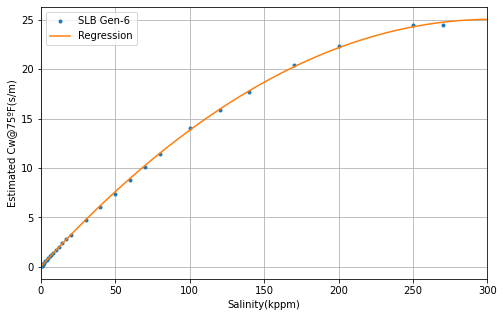

In [13]:
# Continuous control points

continous_x = df_salrw ['sal']
continous_y = new_y(continous_x)

plt.figure(figsize=(8,5))
plt.plot(x/1000, y, '.',label="SLB Gen-6")
plt.plot(continous_x/1000, continous_y, label="Regression")
plt.xlabel("Salinity(kppm)")
plt.ylabel("Estimated Cw@75ºF(s/m)")
plt.grid(True)
plt.xlim(0,300)
plt.legend()
plt.show()

Fig.3 - Regression of the control data

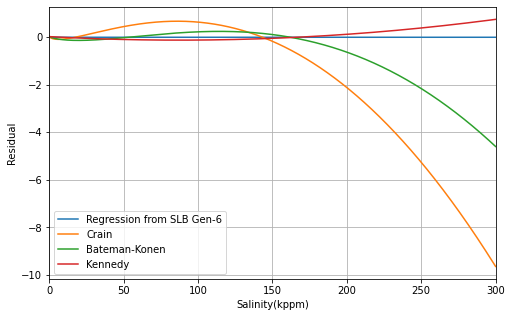

In [14]:
plt.figure(figsize=(8,5))
plt.plot(continous_x/1000, continous_y - continous_y, label="Regression from SLB Gen-6")
plt.plot(continous_x/1000, continous_y - df_salrw['cw75c'], label="Crain")
plt.plot(continous_x/1000, continous_y - df_salrw['cw75bk'], label="Bateman-Konen")
plt.plot(continous_x/1000, continous_y - df_salrw['cw75k'], label="Kennedy")
plt.xlabel("Salinity(kppm)")
plt.ylabel("Residual")
plt.grid(True)
plt.xlim(0,300)
plt.legend()
plt.show()

Fig.4 - Residual of the three formulas respect to the control data

## Final observation

A residual of formula respect a control data (regression in this case) should be distributed around zero. Figure 4 confirms what in shown in figure 3B, that the Kennedy formula is the best from salinity to conductivity. The other two formulas show strong trends far from zero, specially between 140 and 160 kppm of salinity.